# Base Model (ARIMA)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from math import sqrt
import time

In [34]:
# read the data
file = "./dataset.csv"
df = pd.read_csv(file, index_col='Date', parse_dates=True)
df

,AUD,EUR,NZD,GBP,BRL,CAD,CNY,DKK,HKD,INR,...,CHF,TWD,THB,VEB,gdpGBP,gdpUSD,GBR_Value,USA_Value,liborUSD,liborGBP
Date,,,,,,,,,,,,,,,,,,,,,
2001-10-01,0.492300,0.915900,0.406800,1.478500,2.687000,1.579400,8.276800,8.115100,7.799200,48.030000,...,1.619600,34.600000,44.590000,7.435000e-01,100.102000,99.250410,-1.864082,-3.311788,2.597400,4.673300
2001-10-02,0.495300,0.914900,0.405500,1.461800,2.700000,1.569600,8.276800,8.126700,7.799300,48.030000,...,1.622700,34.620000,44.700000,7.430000e-01,100.097058,99.246839,-1.871180,-3.319114,2.578500,4.625553
2001-10-03,0.497100,0.918100,0.409300,1.475600,2.729000,1.568800,8.276800,8.096800,7.799500,47.960000,...,1.615700,34.610000,44.690000,7.432000e-01,100.092116,99.243267,-1.878278,-3.326440,2.559599,4.577806
2001-10-04,0.497500,0.914100,0.408400,1.477400,2.729000,1.568000,8.276800,8.133900,7.799800,48.040000,...,1.624800,34.610000,44.690000,7.430000e-01,100.087175,99.239696,-1.885376,-3.333766,2.540699,4.530060
2001-10-05,0.506000,0.916800,0.413500,1.479500,2.754000,1.562600,8.276800,8.111500,7.799900,48.050000,...,1.620400,34.600000,44.770000,7.433000e-01,100.082233,99.236125,-1.892474,-3.341092,2.521798,4.482313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-11,1.515841,0.931735,1.631062,0.786051,5.353400,1.376758,7.253578,6.949577,7.811661,83.638895,...,0.898800,32.404316,36.767378,3.640488e+06,99.754760,100.491200,-2.506553,-2.901892,5.447840,5.318920
2024-06-12,1.492555,0.922254,1.608355,0.778792,5.391727,1.369258,7.238321,6.878984,7.808406,83.461257,...,0.891796,32.208627,36.463539,3.639495e+06,99.754760,100.491200,-2.506553,-2.901892,5.447840,5.318920
2024-06-13,1.505802,0.929766,1.620082,0.783488,5.378350,1.374745,7.251951,6.936063,7.810498,83.541961,...,0.893493,32.372222,36.745992,3.640529e+06,99.754760,100.491200,-2.506553,-2.901892,5.447840,5.318920


In [35]:
# extract the univariate series
variable_to_predict = df['GBP']
variable_to_predict

Date
2001-10-01    1.478500
2001-10-02    1.461800
2001-10-03    1.475600
2001-10-04    1.477400
2001-10-05    1.479500
                ...   
2024-06-11    0.786051
2024-06-12    0.778792
2024-06-13    0.783488
2024-06-14    0.788411
2024-06-15    0.788277
Name: GBP, Length: 6126, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

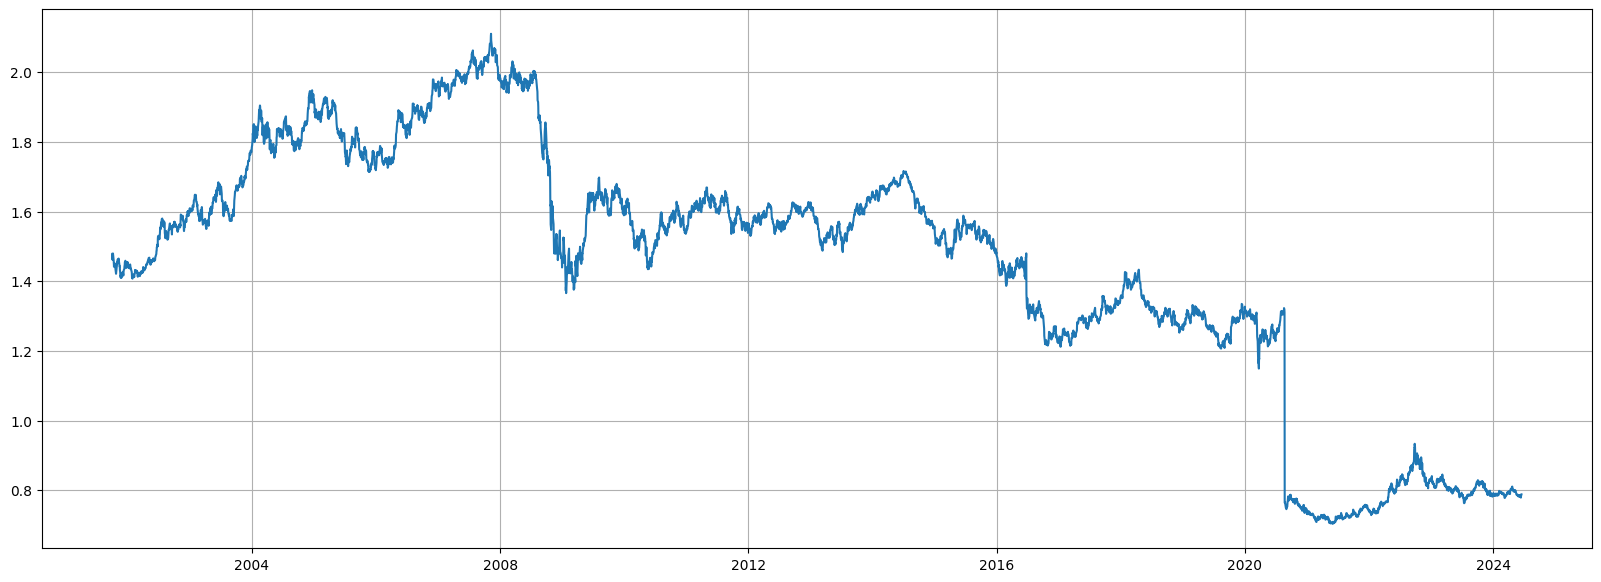

In [44]:
# plot the series
plt.figure(figsize=(20,7))
plt.plot(variable_to_predict)
plt.grid(True)
plt.show

In [37]:
# Augmented Dickey-Fuller test for staionarity
result = adfuller(variable_to_predict)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# the series is not stationary

ADF Statistic: -0.557561
p-value: 0.880286
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


ADF statistics is bigger than critical values (-1.185785 > 1%: -3.432,	5%: -2.862, 10%: -2.567), meaning that we cannot reject the null-hypothesis stating that there is the presence of unit root. So our time-series is *un*stationary. We should make it stationary first.

In [38]:
# get the differences of the observations for stationarity
variable_to_predict_diff1 = variable_to_predict.diff()
variable_to_predict_diff1 # first row should be dropped due to the NaN value

Date
2001-10-01         NaN
2001-10-02   -0.016700
2001-10-03    0.013800
2001-10-04    0.001800
2001-10-05    0.002100
                ...   
2024-06-11    0.000517
2024-06-12   -0.007259
2024-06-13    0.004696
2024-06-14    0.004923
2024-06-15   -0.000134
Name: GBP, Length: 6126, dtype: float64

In [39]:
# drop the NaN row
variable_to_predict_diff1.dropna(inplace=True)
variable_to_predict_diff1 # now the series one less --> 4919

Date
2001-10-02   -0.016700
2001-10-03    0.013800
2001-10-04    0.001800
2001-10-05    0.002100
2001-10-09   -0.019000
                ...   
2024-06-11    0.000517
2024-06-12   -0.007259
2024-06-13    0.004696
2024-06-14    0.004923
2024-06-15   -0.000134
Name: GBP, Length: 6125, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

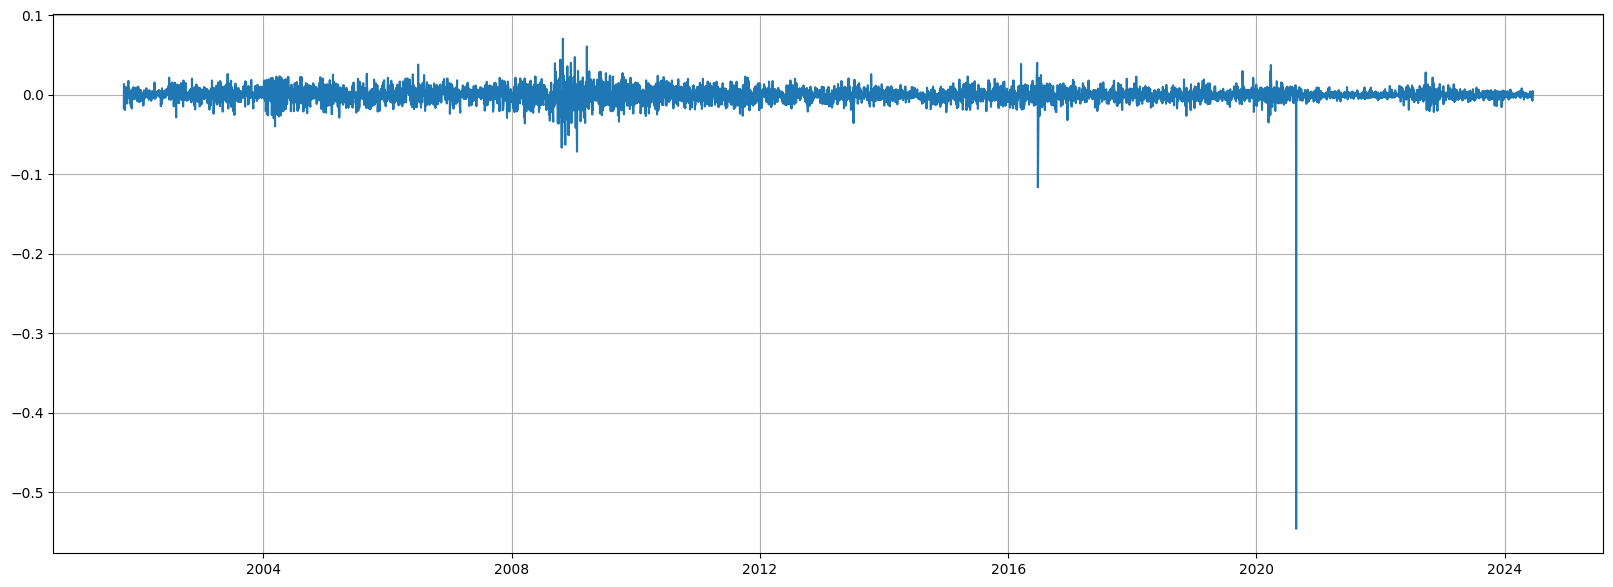

In [40]:
# plot the series again to observe stationarity
plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(variable_to_predict_diff1)
plt.show

In [41]:
# This is the day has the min value in the series
variable_to_predict_diff1.idxmin()

Timestamp('2020-08-22 00:00:00')

In [42]:
# delete that day
variable_to_predict_diff1 = variable_to_predict_diff1.drop(variable_to_predict_diff1.idxmin())

<function matplotlib.pyplot.show(close=None, block=None)>

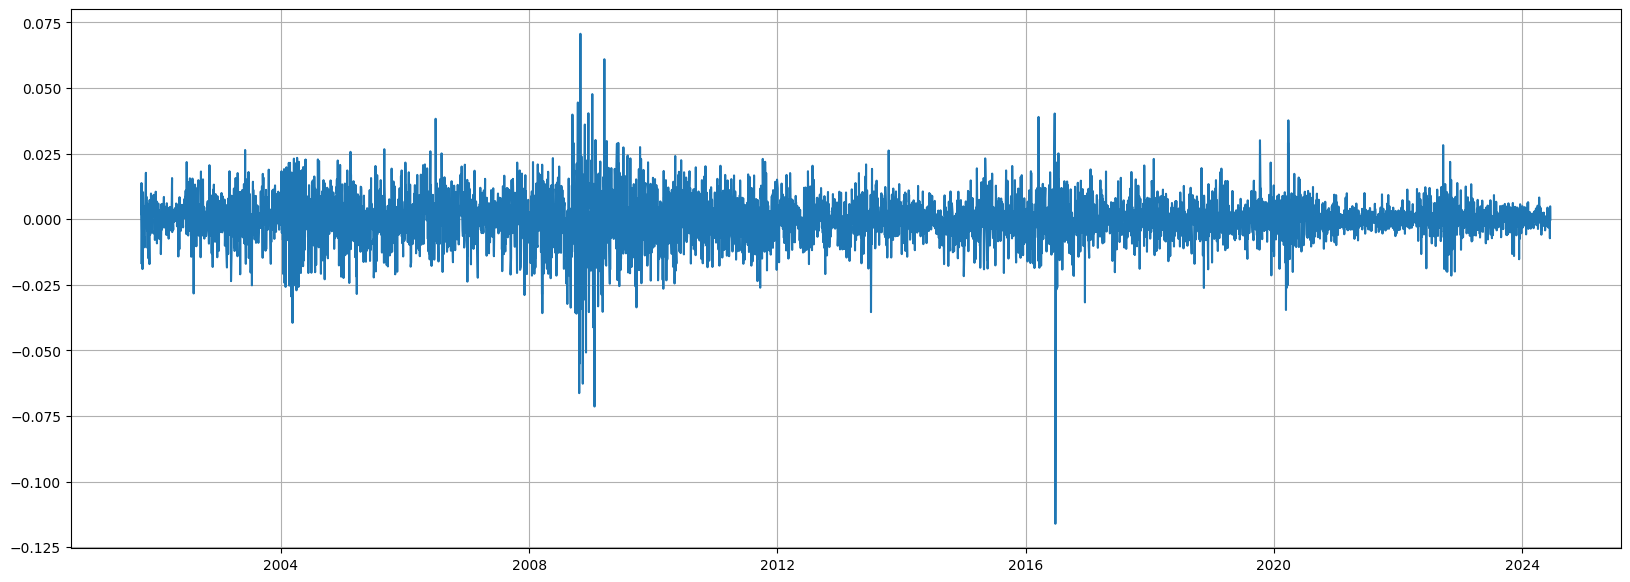

In [43]:
# plot the series again to observe stationarity
plt.figure(figsize=(20,7))
plt.grid(True)
plt.plot(variable_to_predict_diff1)
plt.show

In [45]:
# we can see the sudden shock on the exchange rate here
variable_to_predict_diff1['22/6/2016':'28/6/2016'], variable_to_predict['22/6/2016':'28/6/2016']

(Date
 2016-06-22    0.0014
 2016-06-23    0.0118
 2016-06-24   -0.1161
 2016-06-27   -0.0422
 2016-06-28    0.0077
 Name: GBP, dtype: float64,
 Date
 2016-06-22    1.4682
 2016-06-23    1.4800
 2016-06-24    1.3639
 2016-06-27    1.3217
 2016-06-28    1.3294
 Name: GBP, dtype: float64)

In [46]:
# check again to see if the series get stationary
result = adfuller(variable_to_predict_diff1, regression='ctt')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.032042
p-value: 0.000000
Critical Values:
	1%: -4.373
	5%: -3.833
	10%: -3.554


This time our series got stationary in every confidence level (smaller than all critical values and/or p-value suggest the rejection of the null-hypothesis)

(-0.05, 0.05)

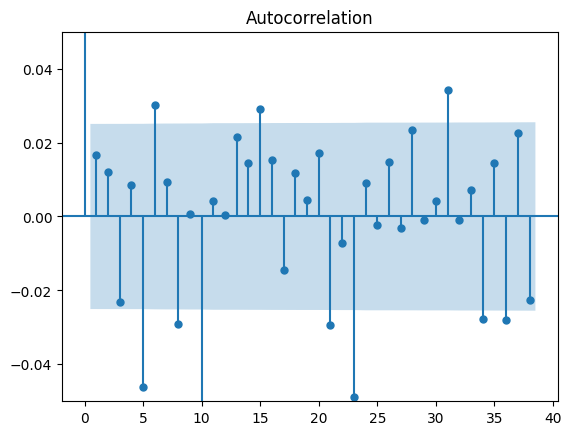

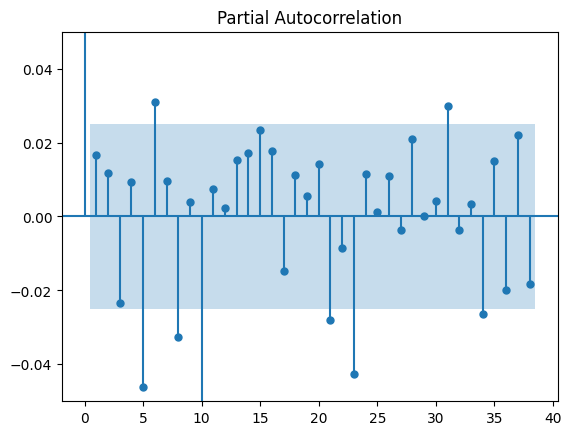

In [47]:
# plot the autocorrelation and partial autocorrelation
# this tells us about the AR(q) and MA(p) values
acf = plot_acf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)
pacf = plot_pacf(variable_to_predict_diff1)
plt.ylim(-0.05,0.05)

ARIMA(p,d,q)
tests suggests ARIMA(1,1,1)
both of the plots shows that the correlation dies away after the first reading.

In [48]:
# Model the ARIMA process
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(variable_to_predict[:-50], order=(1,1,1), trend='n')
result = model.fit()
result.summary()

/Users/user/RepoGithub/DSP-Forecasting-Reer/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/RepoGithub/DSP-Forecasting-Reer/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/user/RepoGithub/DSP-Forecasting-Reer/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GBP   No. Observations:                 6076
Model:                 ARIMA(1, 1, 1)   Log Likelihood               18729.190
Date:                Wed, 17 Jul 2024   AIC                         -37452.381
Time:                        04:51:07   BIC                         -37432.245
Sample:                             0   HQIC                        -37445.393
                               - 6076                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1784      0.790      0.226      0.821      -1.370       1.727
ma.L1         -0.1615      0.791     -0.204      0.838      -1.712       1.389
sigma2         0.0001   1.12e-07   1093.008      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         237291615.57
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                           -19.91
Prob(H) (two-sided):                  0.00   Kurtosis:                       970.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

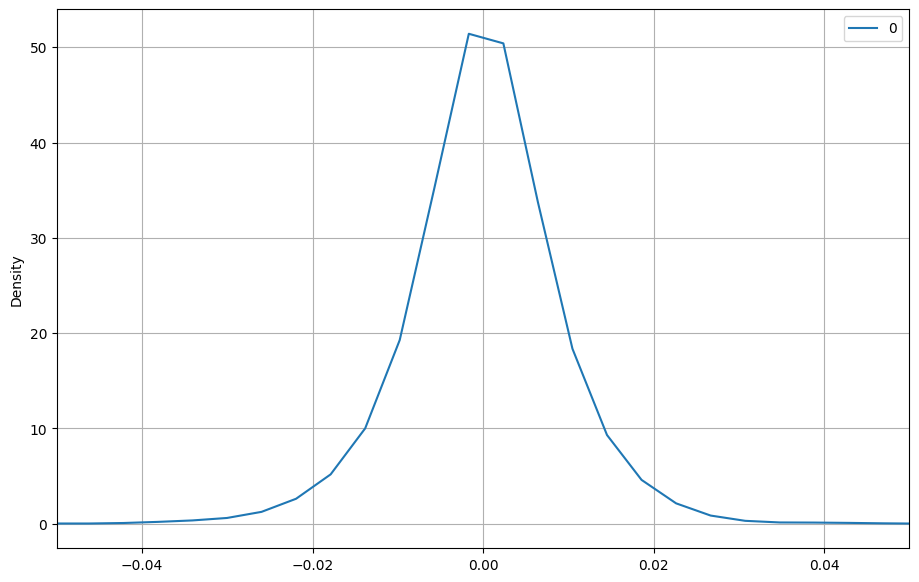

In [49]:
# the residual distribution is very close to normal distribution
residuals = pd.DataFrame(result.resid)
residuals.plot(kind='kde', figsize=(11,7))
plt.xlim(-0.05,0.05)
plt.grid(True)
plt.show()

/var/folders/_h/_mbf393j6vn3d57lvxzw185c0000gn/T/ipykernel_40848/1217682118.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


 predicted=0.801822, expected=0.800576 
 predicted=0.800557, expected=0.798945 
 predicted=0.798914, expected=0.796730 
 predicted=0.796687, expected=0.799142 
 predicted=0.799176, expected=0.800790 
 predicted=0.800823, expected=0.799565 
 predicted=0.799550, expected=0.796980 
 predicted=0.796934, expected=0.797097 
 predicted=0.797092, expected=0.797479 
 predicted=0.797485, expected=0.795348 
 predicted=0.795313, expected=0.797866 
 predicted=0.797903, expected=0.799822 
 predicted=0.799861, expected=0.799803 
 predicted=0.799809, expected=0.798356 
 predicted=0.798332, expected=0.798494 
 predicted=0.798493, expected=0.798604 
 predicted=0.798606, expected=0.796196 
 predicted=0.796155, expected=0.794411 
 predicted=0.794374, expected=0.790168 
 predicted=0.790090, expected=0.788665 
 predicted=0.788627, expected=0.787411 
 predicted=0.787384, expected=0.787224 
 predicted=0.787216, expected=0.788257 
 predicted=0.788273, expected=0.787093 
 predicted=0.787076, expected=0.786897 


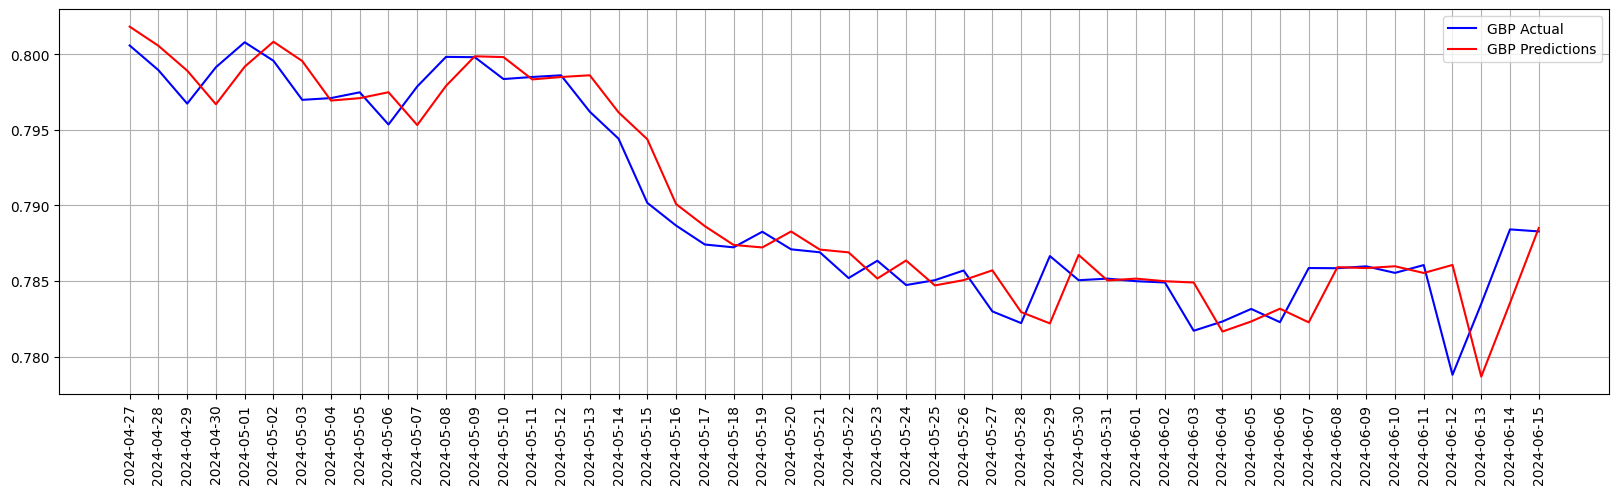

Test RMSE: 0.00218
Test MSE: 0.00000
Test MAE: 0.00157
Test MAPE: 0.19862
Total time: 14.032347202301025 seconds


In [53]:
# evaluate an ARIMA model using a walk-forward validation
start = time.time()

X = variable_to_predict
size = len(X[:-50]) # Only the last 50 elements will be used for test
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()
len(test)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1), trend='n')
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
plt.figure(figsize=(20,5))
plt.plot(test.index, test, color='blue')
plt.plot(test.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(test.index, rotation=90)
plt.grid(True)
plt.show()

# Calculate performance metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
rmse = sqrt(mse)

print(f'Test RMSE: {rmse:.5f}')
print(f'Test MSE: {mse:.5f}')
print(f'Test MAE: {mae:.5f}')
print(f'Test MAPE: {mape:.5f}')

end = time.time()
print("Total time:", end-start, "seconds")